In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report

import pickle

import warnings 
warnings.filterwarnings('ignore')
pd.set_option('display.max_rows', 500)

In [31]:
df_train = pd.read_csv('D:/Data Science/Big Data Technology/Project/Streaming-Fraud-Detection/Streaming-Fraud-Detection/data/raw/fraudTrain.csv',low_memory=False, index_col= 0)
df_test = pd.read_csv('D:/Data Science/Big Data Technology/Project/Streaming-Fraud-Detection/Streaming-Fraud-Detection/data/raw/fraudTest.csv',low_memory=False, index_col= 0)

In [32]:
df = pd.concat([df_train, df_test],ignore_index=True)

In [33]:
df.is_fraud.value_counts()

is_fraud
0    1842743
1       9651
Name: count, dtype: int64

In [34]:
df.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


## Looking into columns and cleaning

In [35]:
print(f"👉 Shape (Rows, Columns): {df.shape}\n")
print(f"👉 Data Types: {df.dtypes}\n")

👉 Shape (Rows, Columns): (1852394, 22)

👉 Data Types: trans_date_trans_time     object
cc_num                     int64
merchant                  object
category                  object
amt                      float64
first                     object
last                      object
gender                    object
street                    object
city                      object
state                     object
zip                        int64
lat                      float64
long                     float64
city_pop                   int64
job                       object
dob                       object
trans_num                 object
unix_time                  int64
merch_lat                float64
merch_long               float64
is_fraud                   int64
dtype: object



In [36]:
df["trans_date_trans_time"] = pd.to_datetime(df["trans_date_trans_time"])
df["dob"] = pd.to_datetime(df["dob"])
df.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [37]:
df_removed = df[['cc_num','first', 'last', 'street', 'city', 'state', 'zip', 'dob', 'trans_num','trans_date_trans_time']]
df = df.drop(['cc_num','first', 'last', 'street', 'city', 'state', 'zip', 'dob', 'trans_num','trans_date_trans_time'],axis=1)

In [38]:
df.head()

,merchant,category,amt,gender,lat,long,city_pop,job,unix_time,merch_lat,merch_long,is_fraud
0,"fraud_Rippin, Kub and Mann",misc_net,4.97,F,36.0788,-81.1781,3495,"Psychologist, counselling",1325376018,36.011293,-82.048315,0
1,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,F,48.8878,-118.2105,149,Special educational needs teacher,1325376044,49.159047,-118.186462,0
2,fraud_Lind-Buckridge,entertainment,220.11,M,42.1808,-112.2620,4154,Nature conservation officer,1325376051,43.150704,-112.154481,0
3,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,M,46.2306,-112.1138,1939,Patent attorney,1325376076,47.034331,-112.561071,0
4,fraud_Keeling-Crist,misc_pos,41.96,M,38.4207,-79.4629,99,Dance movement psychotherapist,1325376186,38.674999,-78.632459,0


In [39]:
def dataframe_summary(df):
    """Provides a concise summary of a Pandas DataFrame."""
    
    print("\n🔹 DataFrame Summary 🔹")
    print("=" * 50)
    
    print(f"📌 Shape: {df.shape[0]} rows, {df.shape[1]} columns\n")
    print("📌 Data Types:\n", df.dtypes, "\n")
    
    missing_values = df.isnull().sum()
    print("📌 Missing Values:\n", missing_values[missing_values > 0] if missing_values.sum() > 0 else "No missing values.", "\n")
    
    print("📌 Statistics:\n", df.describe().T, "\n")
    print("📌 Unique Values:\n", df.nunique(), "\n")
    print("📌 Memory Usage:\n", df.memory_usage(deep=True), "\n")
    print("📌 Sample Data:\n", df.head(), "\n")
    
    print("=" * 50)

In [40]:
dataframe_summary(df)


🔹 DataFrame Summary 🔹
📌 Shape: 1852394 rows, 12 columns

📌 Data Types:
 merchant       object
category       object
amt           float64
gender         object
lat           float64
long          float64
city_pop        int64
job            object
unix_time       int64
merch_lat     float64
merch_long    float64
is_fraud        int64
dtype: object 

📌 Missing Values:
 No missing values. 

📌 Statistics:
                 count          mean           std           min           25%  \
amt         1852394.0  7.006357e+01  1.592540e+02  1.000000e+00  9.640000e+00   
lat         1852394.0  3.853931e+01  5.071470e+00  2.002710e+01  3.466890e+01   
long        1852394.0 -9.022783e+01  1.374789e+01 -1.656723e+02 -9.679800e+01   
city_pop    1852394.0  8.864367e+04  3.014876e+05  2.300000e+01  7.410000e+02   
unix_time   1852394.0  1.358674e+09  1.819508e+07  1.325376e+09  1.343017e+09   
merch_lat   1852394.0  3.853898e+01  5.105604e+00  1.902742e+01  3.474012e+01   
merch_long  1852394.0 -9.

# Exploratory Data Analysis

### Transaction amount vs Fraud
With the dataset cleaned, we can now start to examine how various features relate to fraud. First we will see how the distrition of transaction amount differs between fraudulent and normal activities. As there are extreme outliers in transaction amount, and the 99 percentile is around $546, we subset the data for any transaction amounts below \$1,000 to make the visualizations more readable.

In [41]:
df['amt'].describe()

count    1.852394e+06
mean     7.006357e+01
std      1.592540e+02
min      1.000000e+00
25%      9.640000e+00
50%      4.745000e+01
75%      8.310000e+01
max      2.894890e+04
Name: amt, dtype: float64

In [42]:
np.percentile(df['amt'],99)

537.9

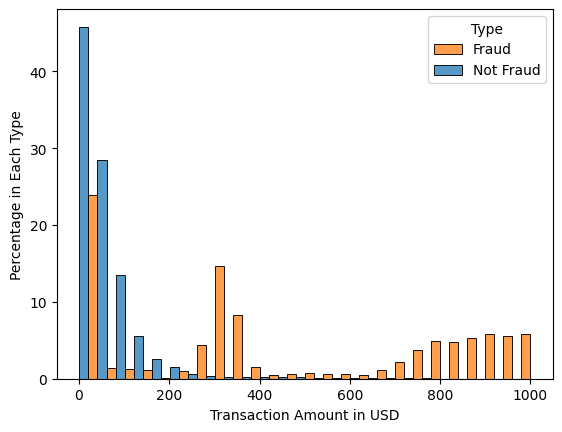

In [43]:
#amount vs fraud
import seaborn as sns
ax=sns.histplot(x='amt',data=df[df.amt<=1000],hue='is_fraud',stat='percent',multiple='dodge',common_norm=False,bins=25)
ax.set_ylabel('Percentage in Each Type')
ax.set_xlabel('Transaction Amount in USD')
plt.legend(title='Type', labels=['Fraud', 'Not Fraud'])

### Gender vs Fraud

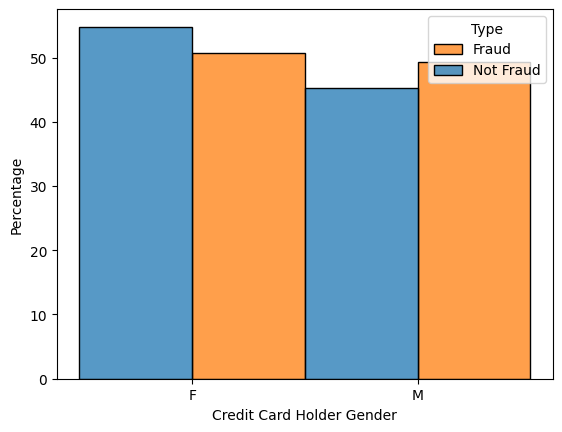

In [44]:
#Gender vs Fraud
ax=sns.histplot(x='gender',data=df, hue='is_fraud',stat='percent',multiple='dodge',common_norm=False)
ax.set_ylabel('Percentage')
ax.set_xlabel('Credit Card Holder Gender')
plt.legend(title='Type', labels=['Fraud', 'Not Fraud'])

In this case, we do not see a clear difference between both genders. Data seem to suggest that females and males are almost equally susceptible (50%) to transaction fraud. Gender is not very indicative of a fraudulent transaction.

### Spending Category vs Fraud

we examine in which spending categories fraud happens most predominantly. To do this, we first calculate the distribution in normal transactions and then the the distribution in fraudulent activities. The difference between the 2 distributions will demonstrate which category is most susceptible to fraud. For example, if 'grocery_pos' accounts for 50% of the total in normal transactions and 50% in fraudulent transactions, this doesn't mean that it is a major category for fraud, it simply means it is just a popular spending category in general. However, if the percentage is 10% in normal but 30% in fraudulent, then we know that there is a pattern.

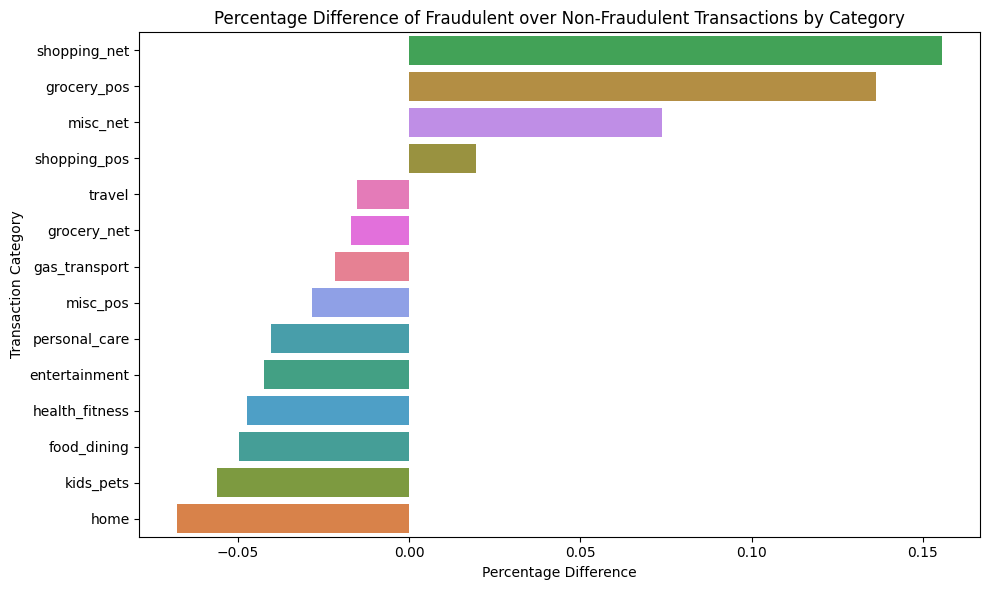

In [45]:
#calculate the percentage difference
a=df[df['is_fraud']==0]['category'].value_counts(normalize=True).to_frame().reset_index()
a.columns=['category','not fraud percentage']

b=df[df['is_fraud']==1]['category'].value_counts(normalize=True).to_frame().reset_index()
b.columns=['category','fraud percentage']

ab=a.merge(b,on='category')
ab['diff']=ab['fraud percentage']-ab['not fraud percentage']

unique_categories = ab['category'].unique()
palette = sns.color_palette("husl", len(unique_categories))

color_dict = dict(zip(unique_categories, palette))

plt.figure(figsize=(10, 6))
ax = sns.barplot(y='category', x='diff', data=ab.sort_values('diff', ascending=False), 
                 palette=[color_dict[cat] for cat in ab.sort_values('diff', ascending=False)['category']])

ax.set_xlabel('Percentage Difference')
ax.set_ylabel('Transaction Category')
plt.title('Percentage Difference of Fraudulent over Non-Fraudulent Transactions by Category')

plt.tight_layout()
plt.show()

Some spending categories indeed see more fraud than others! Fraud tends to happen more often in 'Shopping_net', 'Grocery_pos', and 'misc_net' while 'home' and 'kids_pets' among others tend to see more normal transactions than fraudulent ones.

In [46]:
df.dtypes

merchant       object
category       object
amt           float64
gender         object
lat           float64
long          float64
city_pop        int64
job            object
unix_time       int64
merch_lat     float64
merch_long    float64
is_fraud        int64
dtype: object

### Age vs Fraud

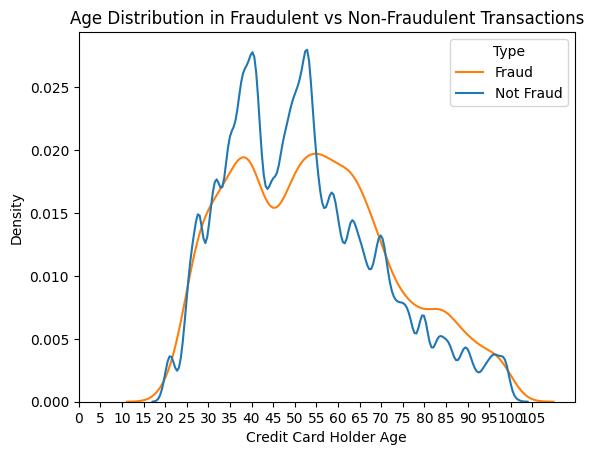

In [47]:
#age vs fraud
import datetime as dt
df['age']=dt.date.today().year-pd.to_datetime(df_removed['dob']).dt.year
ax=sns.kdeplot(x='age',data=df, hue='is_fraud', common_norm=False)
ax.set_xlabel('Credit Card Holder Age')
ax.set_ylabel('Density')
plt.xticks(np.arange(0,110,5))
plt.title('Age Distribution in Fraudulent vs Non-Fraudulent Transactions')
plt.legend(title='Type', labels=['Fraud', 'Not Fraud'])

The age distribution is visibly different between 2 transaction types. In normal transactions, there are 2 peaks at the age of 37-38 and 49-50, while in fraudulent transactions, the age distribution is a little smoother and the second peak does include a wider age group from 50-65. This does suggest that older people are potentially more prone to fraud.

### Cyclicality of Credit Card Fraud
How do fraudulent transactions distribute on the temporal spectrum? Is there an hourly, monthly, or seasonal trend? We can use the transaction time column to answer this question.

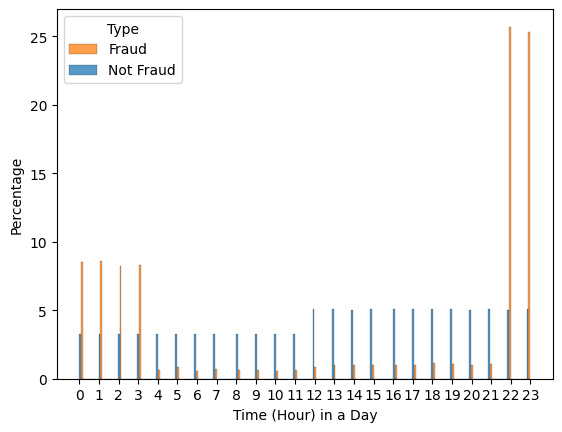

In [48]:
#time in a day vs fraud
df['hour']=pd.to_datetime(df_removed['trans_date_trans_time']).dt.hour
ax=sns.histplot(data=df, x="hour", hue="is_fraud", common_norm=False,stat='percent',multiple='dodge')
ax.set_ylabel('Percentage')
ax.set_xlabel('Time (Hour) in a Day')
plt.xticks(np.arange(0,24,1))
plt.legend(title='Type', labels=['Fraud', 'Not Fraud'])

A very sharp contrast! While normal transactions distribute more or less equally throughout the day, fraudulent payments happen disproportionately around midnight when most people are asleep!

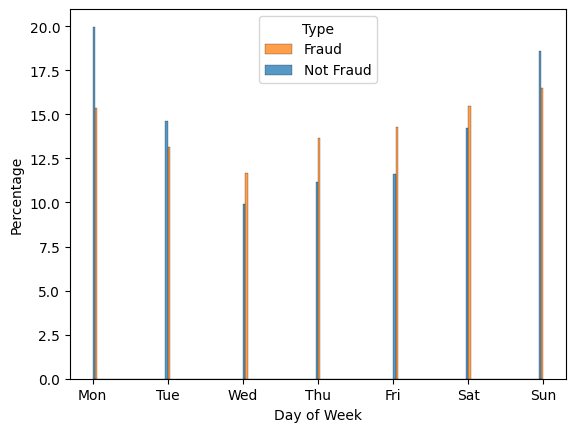

In [49]:
#day of week vs fraud
df['day']=pd.to_datetime(df_removed['trans_date_trans_time']).dt.dayofweek
ax=sns.histplot(data=df, x="day", hue="is_fraud", common_norm=False,stat='percent',multiple='dodge')
ax.set_xticklabels(['',"Mon","Tue","Wed","Thu","Fri","Sat","Sun"])
ax.set_ylabel('Percentage')
ax.set_xlabel('Day of Week')
plt.legend(title='Type', labels=['Fraud', 'Not Fraud'])

Normal transactions tend to happen more often on Monday and Sunday while fraudulent ones tend to spread out more evenly throughout the week.

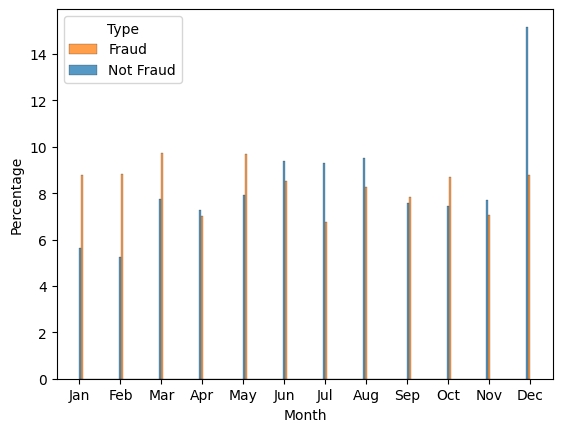

In [50]:
#month vs fraud
df['month']=pd.to_datetime(df_removed['trans_date_trans_time']).dt.month
ax=sns.histplot(data=df, x="month", hue="is_fraud", common_norm=False,stat='percent',multiple='dodge')
ax.set_ylabel('Percentage')
ax.set_xlabel('Month')
plt.xticks(np.arange(1,13,1))
ax.set_xticklabels(["Jan","Feb","Mar","Apr","May","Jun","Jul",'Aug','Sep','Oct','Nov','Dec'])
plt.legend(title='Type', labels=['Fraud', 'Not Fraud'])

Very interesting results! While normal payments peak around December (Christmas), and then late spring to early summer, fraudulent transactions are more concentrated in Jan-May. There is a clear seasonal trend.

## Sampling and handling the minority class using SMOTE

In [51]:
encoder = LabelEncoder()
df["merchant"] = encoder.fit_transform(df["merchant"])
df["category"] = encoder.fit_transform(df["category"])
df["gender"] = encoder.fit_transform(df["gender"])
df["job"] = encoder.fit_transform(df["job"])

In [52]:
df.head()

,merchant,category,amt,gender,lat,long,city_pop,job,unix_time,merch_lat,merch_long,is_fraud,age,hour,day,month
0,514,8,4.97,0,36.0788,-81.1781,3495,372,1325376018,36.011293,-82.048315,0,37,0,1,1
1,241,4,107.23,0,48.8878,-118.2105,149,431,1325376044,49.159047,-118.186462,0,47,0,1,1
2,390,0,220.11,1,42.1808,-112.2620,4154,308,1325376051,43.150704,-112.154481,0,63,0,1,1
3,360,2,45.00,1,46.2306,-112.1138,1939,330,1325376076,47.034331,-112.561071,0,58,0,1,1
4,297,9,41.96,1,38.4207,-79.4629,99,116,1325376186,38.674999,-78.632459,0,39,0,1,1


In [53]:
df.shape

(1852394, 16)

# Splitting data into train and test

In [54]:
train, test = train_test_split(df, test_size=0.2, shuffle=True, random_state=42)
train = train.reset_index(drop=True)
test = test.reset_index(drop=True)
train.shape, test.shape

((1481915, 16), (370479, 16))

In [55]:
train.head()

,merchant,category,amt,gender,lat,long,city_pop,job,unix_time,merch_lat,merch_long,is_fraud,age,hour,day,month
0,29,4,166.80,1,39.3426,-114.8859,450,254,1371108903,40.088507,-113.895268,0,79,7,5,6
1,536,11,28.86,0,34.3795,-118.5230,34882,219,1347476946,35.356925,-119.348148,0,54,19,3,9
2,153,2,37.93,0,40.3207,-110.4360,302,406,1360819865,40.422976,-110.786285,0,35,5,4,2
3,677,9,18.70,1,41.2244,-86.6966,5791,134,1367973195,40.254936,-85.751919,0,66,0,4,5
4,688,8,33.54,0,31.9290,-97.6443,2526,342,1378348271,32.397579,-97.395488,0,55,2,5,9


In [56]:
train.to_csv("D:/Data Science/Big Data Technology/Project/Streaming-Fraud-Detection/Streaming-Fraud-Detection/data/processed/clean_train.csv")

In [57]:
test.to_csv("D:/Data Science/Big Data Technology/Project/Streaming-Fraud-Detection/Streaming-Fraud-Detection/data/processed/clean_test.csv")